In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('StressLevelDataset.csv')  # Replace with your file path if needed

# Display initial info to verify loading
print(df.head())  # First few rows
print(df.shape)   # Number of rows and columns
print(df.info())  # Data types and non-null counts

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [ ]:
# Technique: Min-Max Scaling on all numerical features
features = df.drop('stress_level', axis=1)  # Exclude target
scaler = MinMaxScaler()  # Initialize scaler (default range [0,1])
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)  # Scale and create new DF
df_scaled['stress_level'] = df['stress_level']  # Add back the target column (unchanged)

In [ ]:
# Output: Summary statistics after scaling
print(df_scaled.describe())

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean        0.526840     0.592576               0.492727     0.465017   
std         0.291312     0.298153               0.500175     0.286185   
min         0.000000     0.000000               0.000000     0.000000   
25%         0.285714     0.366667               0.000000     0.222222   
50%         0.523810     0.633333               0.000000     0.444444   
75%         0.761905     0.866667               1.000000     0.703704   
max         1.000000     1.000000               1.000000     1.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      0.501636        0.590909       0.532000           0.550727   
std       0.281871        0.416787       0.309677           0.280143   
min       0.000000        0.000000       0.000000     

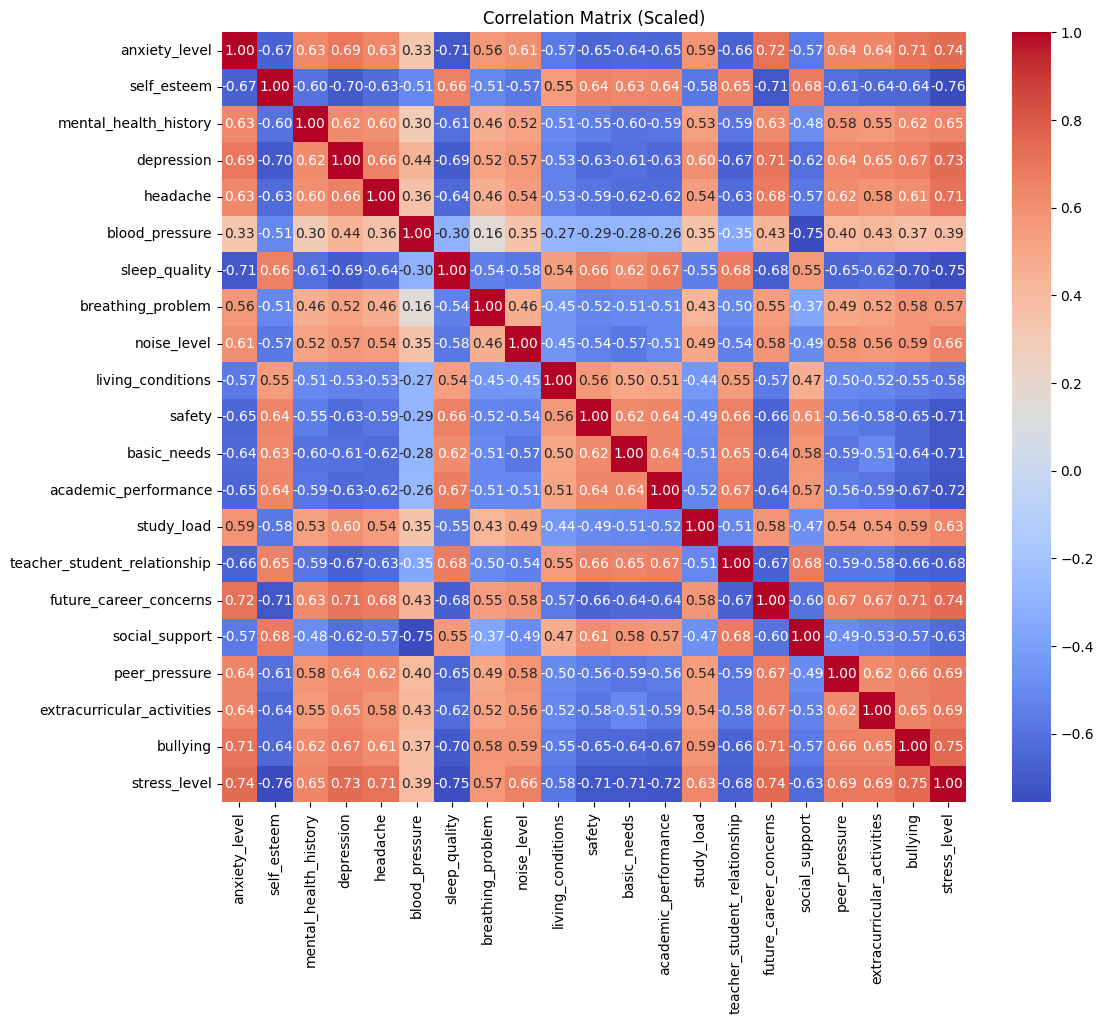

In [ ]:
# EDA: Correlation heatmap (post-scaling)
plt.figure(figsize=(12,10))  # Set figure size for readability
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Heatmap with annotations (2 decimal places)
plt.title('Correlation Matrix (Scaled)')  # Title
plt.savefig('corr_heatmap.png')  # Save to the current directory
plt.show()  # Display in notebook

In [12]:
display(df_scaled.head())

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.666667,0.666667,0.0,0.407407,0.4,0.0,0.4,0.8,0.4,0.6,...,0.4,0.6,0.4,0.6,0.6,0.666667,0.6,0.6,0.4,1
1,0.714286,0.266667,1.0,0.555556,1.0,1.0,0.2,0.8,0.6,0.2,...,0.4,0.2,0.8,0.2,1.0,0.333333,0.8,1.0,1.0,2
2,0.571429,0.600000,1.0,0.518519,0.4,0.0,0.4,0.4,0.4,0.4,...,0.4,0.4,0.6,0.6,0.4,0.666667,0.6,0.4,0.4,1
3,0.761905,0.400000,1.0,0.555556,0.8,1.0,0.2,0.6,0.8,0.4,...,0.4,0.4,0.8,0.2,0.8,0.333333,0.8,0.8,1.0,2
4,0.761905,0.933333,0.0,0.259259,0.4,1.0,1.0,0.2,0.6,0.4,...,0.6,0.8,0.6,0.2,0.4,0.333333,1.0,0.0,1.0,1


In [13]:
df_scaled.to_csv('StressLevelDataset_scaled.csv', index=False)